In [9]:
# Importando as bibliotecas
import os
import kagglehub
import pandas as pd
import seaborn as sns
import statistics as sts

In [10]:
# Baixando o dataset
path = kagglehub.dataset_download("parisrohan/credit-score-classification")

df = pd.read_csv(os.path.join(path, "train.csv"))
df.head()

/tmp/ipykernel_3687098/1316385527.py:4: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(path, "train.csv"))


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [11]:
# Tamanho
df.shape

(100000, 28)

In [12]:
# Traduzindo as colunas
schema = ["id", "id_do_cliente", "mes", "nome", "idade", "cpf", "profissao", "renda_anual", "salario_mensal_recebido", "numero_de_contas_bancarias",
"numero_de_cartoes_de_credito", "taxa_de_juros", "numero_de_emprestimos", "tipo_de_emprestimo", "atraso_a_data_de_vencimento", "numero_de_pagamentos_atrasados", 
"limite_de_credito_alterado", "numero_de_consultas_de_credito", "mix_de_credito", "divida_acumulada", "indice_de_utilizacao_de_credito", "idade_do_historico_de_credito", 
"pagamento_do_valor_minimo", "total_de_emi_por_mes", "valor_investido_mensal", "comportamento_de_pagamento", "saldo_mensal", "pontuacao_de_credito"]

df.columns = schema
df.head()

,id,id_do_cliente,mes,nome,idade,cpf,profissao,renda_anual,salario_mensal_recebido,numero_de_contas_bancarias,...,mix_de_credito,divida_acumulada,indice_de_utilizacao_de_credito,idade_do_historico_de_credito,pagamento_do_valor_minimo,total_de_emi_por_mes,valor_investido_mensal,comportamento_de_pagamento,saldo_mensal,pontuacao_de_credito
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [19]:
# Explorando dados categoricos
agrupado = df.groupby(['salario_mensal_recebido']).size()
agrupado

salario_mensal_recebido
303.645417      8
319.556250      7
332.128333      7
332.431250      6
333.596667      6
               ..
15101.940000    8
15115.190000    7
15136.696667    7
15167.180000    8
15204.633333    7
Length: 13235, dtype: int64

<Axes: xlabel='salario_mensal_recebido'>

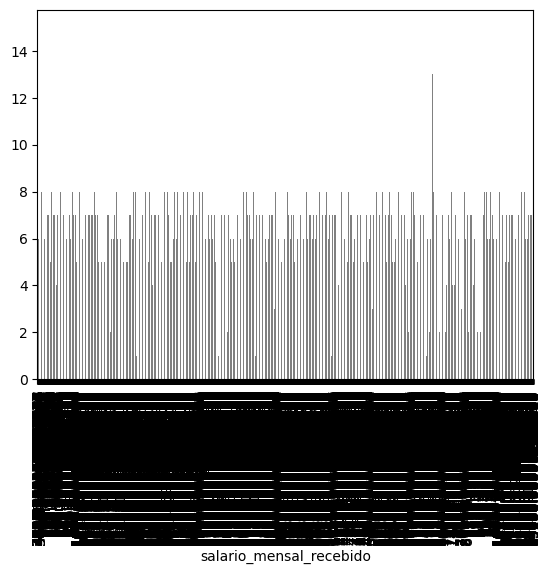

In [20]:
# Visualização por gráficos
agrupado.plot.bar(color = 'gray')

/tmp/ipykernel_3687098/2313726903.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['salario_mensal_recebido']).set_title('salario_mensal_recebido')


Text(0.5, 1.0, 'salario_mensal_recebido')

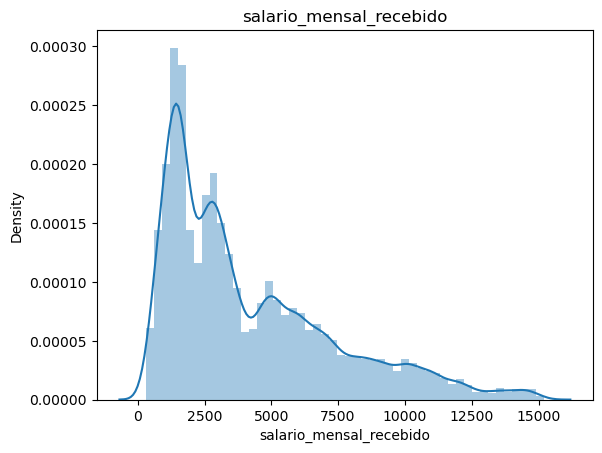

In [22]:
# Distribuição
sns.distplot(df['salario_mensal_recebido']).set_title('salario_mensal_recebido')